In [1]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from collections import defaultdict
import time
import datetime as dt
from pytz import timezone
tz = timezone('EST')
from tqdm import tqdm

In [3]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [4]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
sns.set()

In [5]:
load = pd.read_csv('Maine.csv')
load.head()
val = load['y']

In [6]:
rng = pd.date_range('2011-01-01', periods=8760, freq='1H')
date_df = pd.DataFrame({ 'ds': rng})
date_df
frames = [date_df, val]
  
load_df = pd.concat(frames, axis=1, ignore_index=False)
display(load_df)

,ds,y
0,2011-01-01 00:00:00,1048
1,2011-01-01 01:00:00,1000
2,2011-01-01 02:00:00,964
3,2011-01-01 03:00:00,954
4,2011-01-01 04:00:00,960
...,...,...
8755,2011-12-31 19:00:00,1379
8756,2011-12-31 20:00:00,1304
8757,2011-12-31 21:00:00,1235
8758,2011-12-31 22:00:00,1178


In [14]:
model = Prophet(
        changepoint_prior_scale=0.5, 
        seasonality_mode='multiplicative', 
        interval_width=0.95, 
    )
model.add_country_holidays(country_name='US')

In [15]:
model.fit(load_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
future_pd = model.make_future_dataframe(
        periods=365, 
        freq='1H',
        include_history=True
    )
    
# make predictions
forecast_pd = model.predict(future_pd)

In [10]:
forecast_pd[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9120,2012-01-16 00:00:00,1097.166385,939.129505,1261.842927
9121,2012-01-16 01:00:00,1055.717232,875.943600,1220.978719
9122,2012-01-16 02:00:00,1036.284949,862.599593,1209.492296
9123,2012-01-16 03:00:00,1044.280435,871.064312,1223.493079
9124,2012-01-16 04:00:00,1090.676783,915.919438,1271.989384


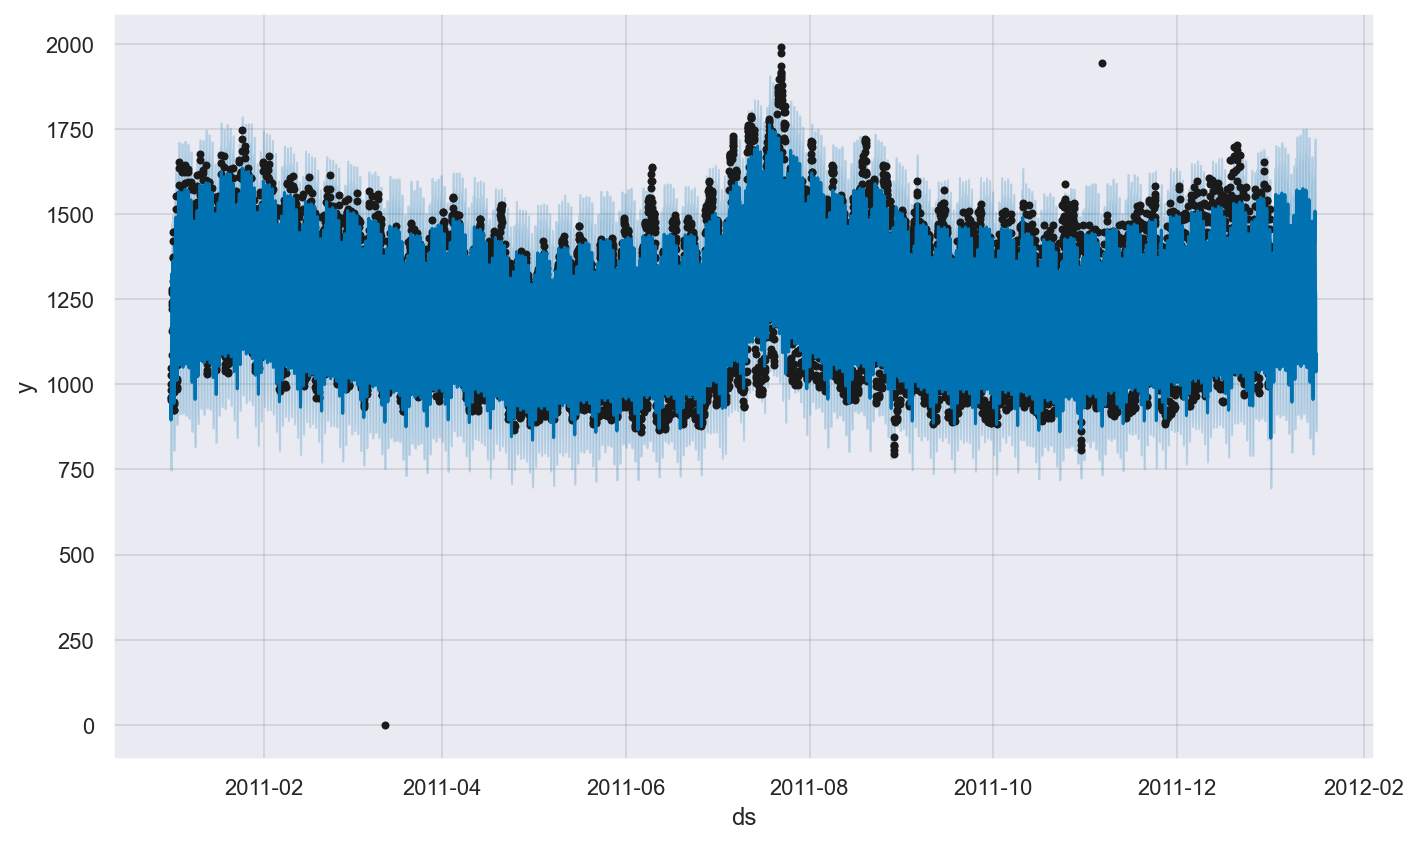

In [11]:
fig1 = model.plot(forecast_pd)

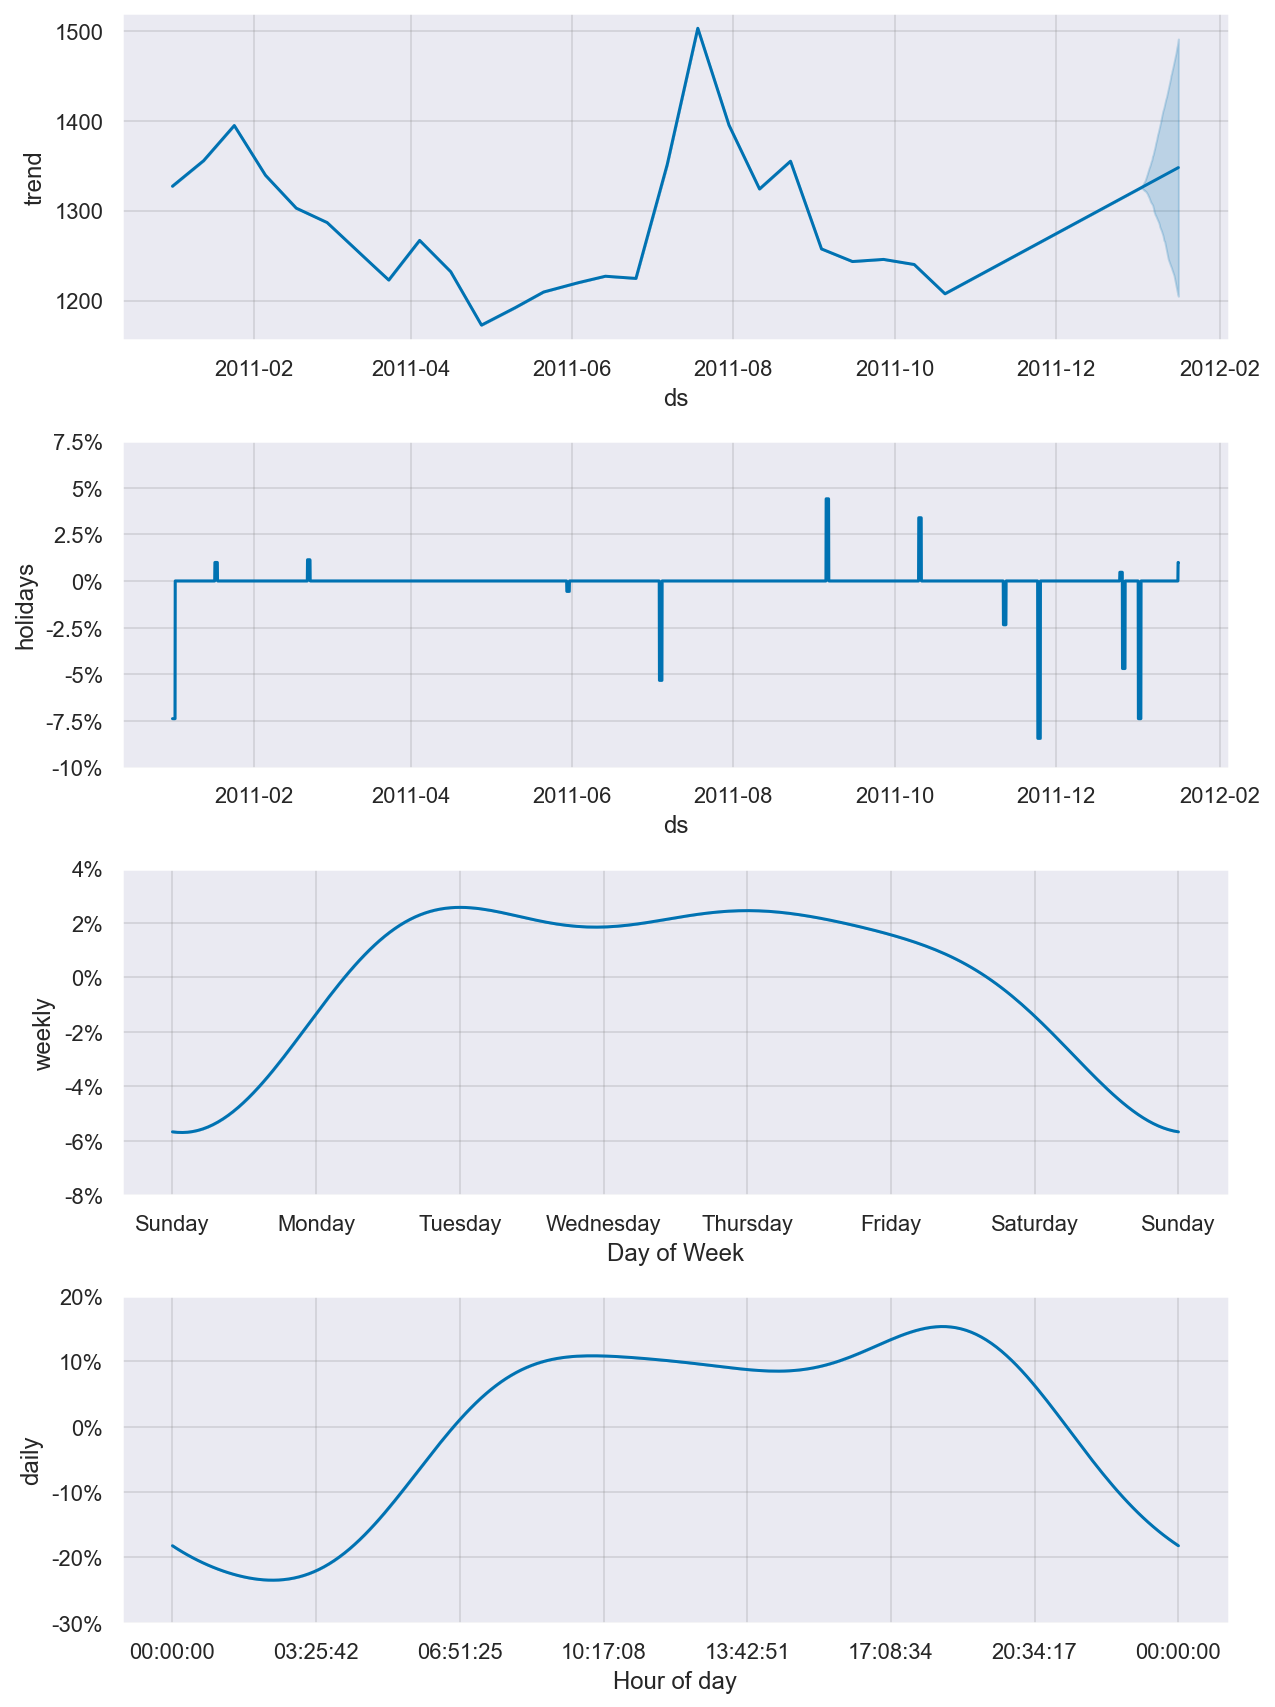

In [12]:
fig2 = model.plot_components(forecast_pd)

In [13]:
forecast_pd

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01 00:00:00,1327.002413,831.663535,1106.413112,1327.002413,1327.002413,0.0,0.0,0.0,0.0,...,-0.270357,-0.270357,-0.270357,-0.014265,-0.014265,-0.014265,0.0,0.0,0.0,968.237946
1,2011-01-01 01:00:00,1327.102456,782.113336,1054.808330,1327.102456,1327.102456,0.0,0.0,0.0,0.0,...,-0.306186,-0.306186,-0.306186,-0.016369,-0.016369,-0.016369,0.0,0.0,0.0,920.762406
2,2011-01-01 02:00:00,1327.202499,756.538361,1036.751800,1327.202499,1327.202499,0.0,0.0,0.0,0.0,...,-0.325684,-0.325684,-0.325684,-0.018523,-0.018523,-0.018523,0.0,0.0,0.0,894.953774
3,2011-01-01 03:00:00,1327.302543,747.668362,1040.854876,1327.302543,1327.302543,0.0,0.0,0.0,0.0,...,-0.324816,-0.324816,-0.324816,-0.020722,-0.020722,-0.020722,0.0,0.0,0.0,896.173588
4,2011-01-01 04:00:00,1327.402586,790.388160,1075.557613,1327.402586,1327.402586,0.0,0.0,0.0,0.0,...,-0.295419,-0.295419,-0.295419,-0.022956,-0.022956,-0.022956,0.0,0.0,0.0,935.262511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,2012-01-16 00:00:00,1347.461220,939.129505,1261.842927,1206.200809,1487.103092,0.0,0.0,0.0,0.0,...,-0.185753,-0.185753,-0.185753,-0.013387,-0.013387,-0.013387,0.0,0.0,0.0,1097.166385
9121,2012-01-16 01:00:00,1347.527458,875.943600,1220.978719,1205.828939,1487.997714,0.0,0.0,0.0,0.0,...,-0.216552,-0.216552,-0.216552,-0.010461,-0.010461,-0.010461,0.0,0.0,0.0,1055.717232
9122,2012-01-16 02:00:00,1347.593697,862.599593,1209.492296,1205.457068,1488.892337,0.0,0.0,0.0,0.0,...,-0.231011,-0.231011,-0.231011,-0.007576,-0.007576,-0.007576,0.0,0.0,0.0,1036.284949
9123,2012-01-16 03:00:00,1347.659935,871.064312,1223.493079,1205.085198,1489.786959,0.0,0.0,0.0,0.0,...,-0.225116,-0.225116,-0.225116,-0.004748,-0.004748,-0.004748,0.0,0.0,0.0,1044.280435
